<a href="https://colab.research.google.com/github/skywalker0803r/CFB/blob/main/%E7%85%99%E5%9B%AA%E6%8E%92%E6%94%BESOx%E6%BF%83%E5%BA%A6Y%E2%82%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/脫硫劑優化改善/20240916-CFB2脫硫劑優化改善.xlsx')
col = df.columns
df = df.iloc[1:,:]
df.columns = col
df = df.set_index('Unnamed: 0')
df.index.name = 'datetime'
df

Mounted at /content/drive


/usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


,MLUT4_AIA792101A,MLUT4_AIA792101B,MLUT4_AIC-232B,MLUT4_AT-232A,MLUT4_AT-237,MLUT4_AT-240,MLUT4_AT-240A,MLUT4_FIC-231A,MLUT4_FIC-231B,MLUT4_FIC-231C,...,MLUT4_TE-252F,MLUT4_TE-252G,MLUT4_TE-252H,MLUT4_TE-252I,MLUT4_ZT-231,MLUT4_ZT-232,DeSOx_1st,DeSOx_2nd,前爐SOx濃度,鈣硫比
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,5.540932,6.8,67.034424,151.208024,9.623605,8.619934,8.619934,20.605973,0,17.456094,...,876.984866,845.297084,845.703201,876.997523,59.200001,15,0.969941,0.871410,2230.093232,2.223152
2024-01-01 00:05:00,5.533478,6.8,66.662524,150.811453,9.616252,8.147002,8.147002,20.18102,0,17.449118,...,875.326466,846.587071,844.10285,877.38106,59.200001,15,0.969979,0.877787,2220.527929,2.220789
2024-01-01 00:10:00,5.526025,6.8,64.320729,151.708113,9.608899,8.247992,8.247992,20.200619,0,17.442142,...,875.675699,845.374599,843.500123,877.8976,59.200001,15,0.971249,0.871768,2237.129686,2.217612
2024-01-01 00:15:00,5.518571,6.801543,64.840762,151.283528,9.600898,7.60582,7.60582,20.220218,0,17.571883,...,875.435828,845.10045,842.910508,874.888616,59.200001,15,0.970896,0.882700,2227.895501,2.214444
2024-01-01 00:20:00,5.511117,6.819977,64.390831,150.994896,9.581994,6.110485,6.110485,20.549012,0,17.339679,...,875.2454,846.058978,844.200021,878.41671,59.200001,15,0.970878,0.905103,2211.052236,2.211285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-15 23:35:00,6.258452,5.140339,114.166438,209.520746,9.360355,13.105704,13.105704,12.795748,11.854892,12.8422,...,916.635699,889.885541,906.016252,870.865216,100,26.103367,0.945172,0.885205,2082.274527,3.928554
2024-09-15 23:40:00,6.284992,5.166336,106.669841,208.177318,9.280099,9.903673,9.903673,12.797045,11.862273,12.823741,...,914.06561,889.042164,904.255862,869.007829,100,26.093265,0.948517,0.907156,2071.948976,3.927730
2024-09-15 23:45:00,6.232171,5.225976,104.663595,211.564232,9.359701,9.345572,9.345572,12.798342,11.880556,12.842696,...,913.978871,890.439554,903.442876,867.71297,100,26.1,0.949882,0.910708,2088.339754,3.928170


#欄位計算

In [2]:
v3 = df['MLUT4_FIQ-2BTCF']
v38 = df['MLUT4_FQ-239']
v3 = pd.to_numeric(v3, errors='coerce')
v38 = pd.to_numeric(v38, errors='coerce')
print((v3 == 0).sum(),(v38 == 0).sum())
print(v3.isnull().sum(),v38.isnull().sum())#2 0
print(v3*8/v38*64.04/24.5*1000,df['前爐SOx濃度'])
assert (v3*8/v38*64.04/24.5*1000).all() == df['前爐SOx濃度'].all()
df['前爐SOx濃度'] = v3*8/v38*64.04/24.5*1000
print(df['前爐SOx濃度'].isnull().sum())#18054

18921 18260
2 0
datetime
2024-01-01 00:00:00    2230.093232
2024-01-01 00:05:00    2220.527929
2024-01-01 00:10:00    2237.129686
2024-01-01 00:15:00    2227.895501
2024-01-01 00:20:00    2211.052236
                          ...     
2024-09-15 23:35:00    2082.274527
2024-09-15 23:40:00    2071.948976
2024-09-15 23:45:00    2088.339754
2024-09-15 23:50:00    2034.665472
2024-09-15 23:55:00    2048.422596
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    2230.093232
2024-01-01 00:05:00    2220.527929
2024-01-01 00:10:00    2237.129686
2024-01-01 00:15:00    2227.895501
2024-01-01 00:20:00    2211.052236
                          ...     
2024-09-15 23:35:00    2082.274527
2024-09-15 23:40:00    2071.948976
2024-09-15 23:45:00    2088.339754
2024-09-15 23:50:00    2034.665472
2024-09-15 23:55:00    2048.422596
Name: 前爐SOx濃度, Length: 74592, dtype: float64
18054


# 缺失值那麼多是0導致的

In [3]:
v1 = df['MLUT4_RQ-2BTLS']
v3 = df['MLUT4_FIQ-2BTCF']
v1 = pd.to_numeric(v1, errors='coerce')
v3 = pd.to_numeric(v3, errors='coerce')
print(v1/v3*0.32/0.008,df['鈣硫比'])
df['鈣硫比'] = v1/v3*0.32/0.008

datetime
2024-01-01 00:00:00    2.223152
2024-01-01 00:05:00    2.220789
2024-01-01 00:10:00    2.217612
2024-01-01 00:15:00    2.214444
2024-01-01 00:20:00    2.211285
                         ...   
2024-09-15 23:35:00    3.928554
2024-09-15 23:40:00    3.927730
2024-09-15 23:45:00    3.928170
2024-09-15 23:50:00    3.927928
2024-09-15 23:55:00    3.928171
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    2.223152
2024-01-01 00:05:00    2.220789
2024-01-01 00:10:00    2.217612
2024-01-01 00:15:00    2.214444
2024-01-01 00:20:00    2.211285
                         ...   
2024-09-15 23:35:00    3.928554
2024-09-15 23:40:00    3.927730
2024-09-15 23:45:00    3.928170
2024-09-15 23:50:00    3.927928
2024-09-15 23:55:00    3.928171
Name: 鈣硫比, Length: 74592, dtype: float64


In [4]:
soxo = v3*8/v38*64.04/24.5*1000
v31 = df['MLUT4_AIC-232B']
v31 = pd.to_numeric(v31, errors='coerce')
print(v31.isnull().sum(),soxo.isnull().sum())
print((soxo-v31)/soxo,df['DeSOx_1st'])
df['DeSOx_1st'] = (soxo-v31)/soxo

0 18054
datetime
2024-01-01 00:00:00    0.969941
2024-01-01 00:05:00    0.969979
2024-01-01 00:10:00    0.971249
2024-01-01 00:15:00    0.970896
2024-01-01 00:20:00    0.970878
                         ...   
2024-09-15 23:35:00    0.945172
2024-09-15 23:40:00    0.948517
2024-09-15 23:45:00    0.949882
2024-09-15 23:50:00    0.949256
2024-09-15 23:55:00    0.946246
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    0.969941
2024-01-01 00:05:00    0.969979
2024-01-01 00:10:00    0.971249
2024-01-01 00:15:00    0.970896
2024-01-01 00:20:00    0.970878
                         ...   
2024-09-15 23:35:00    0.945172
2024-09-15 23:40:00    0.948517
2024-09-15 23:45:00    0.949882
2024-09-15 23:50:00    0.949256
2024-09-15 23:55:00    0.946246
Name: DeSOx_1st, Length: 74592, dtype: float64


In [5]:
v31 = df['MLUT4_AIC-232B']
v39 = df['MLUT4_AT-240']
v31 = pd.to_numeric(v31, errors='coerce')
v39 = pd.to_numeric(v39, errors='coerce')
print((v31-v39)/v31,df['DeSOx_2nd'])
df['DeSOx_2nd'] = (v31-v39)/v31

datetime
2024-01-01 00:00:00    0.871410
2024-01-01 00:05:00    0.877787
2024-01-01 00:10:00    0.871768
2024-01-01 00:15:00    0.882700
2024-01-01 00:20:00    0.905103
                         ...   
2024-09-15 23:35:00    0.885205
2024-09-15 23:40:00    0.907156
2024-09-15 23:45:00    0.910708
2024-09-15 23:50:00    0.919579
2024-09-15 23:55:00    0.918868
Length: 74592, dtype: float64 datetime
2024-01-01 00:00:00    0.871410
2024-01-01 00:05:00    0.877787
2024-01-01 00:10:00    0.871768
2024-01-01 00:15:00    0.882700
2024-01-01 00:20:00    0.905103
                         ...   
2024-09-15 23:35:00    0.885205
2024-09-15 23:40:00    0.907156
2024-09-15 23:45:00    0.910708
2024-09-15 23:50:00    0.919579
2024-09-15 23:55:00    0.918868
Name: DeSOx_2nd, Length: 74592, dtype: float64


# 缺失值檢查

In [7]:
import pandas as pd

def check_missing_values(df):
    """
    檢查 DataFrame 中每個欄位的缺失值數量與占比

    參數:
        df (pd.DataFrame): 要檢查的 DataFrame

    回傳:
        pd.DataFrame: 包含欄位名稱、缺失值數量、缺失占比的 DataFrame
    """
    total_rows = len(df)
    missing_count = df.isnull().sum()
    missing_ratio = missing_count / total_rows

    result = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Ratio': missing_ratio
    })

    return result[result['Missing Count'] > 0].sort_values(by='Missing Ratio', ascending=False)
check_missing_values(df)

,Missing Count,Missing Ratio
MLUT4_SIV-B7921,67848,0.909588
DeSOx_1st,18854,0.252762
鈣硫比,18798,0.252011
前爐SOx濃度,18054,0.242037
DeSOx_2nd,10351,0.138768
MLUT4_AIA792101B,2,0.000027
MLUT4_AT-232A,2,0.000027
MLUT4_AT-237,2,0.000027
MLUT4_AIA792101A,2,0.000027
MLUT4_FIC-233,2,0.000027


# 特徵篩選

<ipython-input-11-2ef28e453ab2>:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  features = select_features_with_catboost(df=df.replace([np.inf, -np.inf], np.nan).dropna(subset=y_col),


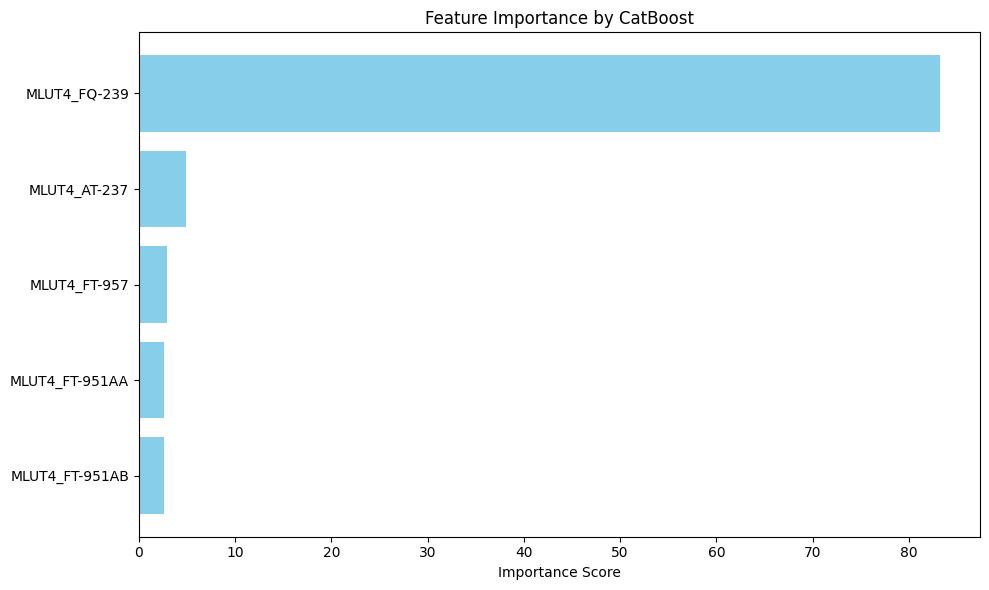

In [11]:
from catboost import CatBoostRegressor, Pool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def select_features_with_catboost(df: pd.DataFrame, x_col: list, y_col: str, top_k: int = None):
    """
    使用 CatBoost 根據特徵重要性篩選特徵。

    參數:
        df (pd.DataFrame): 資料集
        x_col (list): 特徵欄位名稱
        y_col (str): 目標欄位名稱
        top_k (int, optional): 若指定，回傳前 top_k 個重要特徵

    回傳:
        list: 篩選後的建議特徵名稱
    """
    # 準備資料
    X = df[x_col]
    y = df[y_col]

    model = CatBoostRegressor(verbose=0)
    model.fit(X, y)

    # 取得特徵重要性
    feature_importances = model.get_feature_importance()
    importance_df = pd.DataFrame({
        'feature': x_col,
        'importance': feature_importances
    }).sort_values(by='importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df.head(top_k)['feature'], importance_df.head(top_k)['importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title("Feature Importance by CatBoost")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

    if  top_k:
        return importance_df['feature'].head(top_k).tolist()
    else:
        return importance_df['feature'].tolist()
x_col = ['MLUT4_AT-237','MLUT4_AT-240','MLUT4_FQ-239','MLUT4_FT-951AA','MLUT4_FT-951AB','MLUT4_FT-956','MLUT4_FT-957']
y_col = ['前爐SOx濃度']

features = select_features_with_catboost(df=df.replace([np.inf, -np.inf], np.nan).dropna(subset=y_col),
                                         x_col=x_col, y_col=y_col, top_k=5)

# 重要特徵

In [12]:
features

['MLUT4_FQ-239',
 'MLUT4_AT-237',
 'MLUT4_FT-957',
 'MLUT4_FT-951AA',
 'MLUT4_FT-951AB']

# 將特徵跟y合併成data

In [13]:
data = df[features+y_col].dropna(subset=y_col)
print(data.isnull().sum())
data

MLUT4_FQ-239      0
MLUT4_AT-237      0
MLUT4_FT-957      0
MLUT4_FT-951AA    0
MLUT4_FT-951AB    0
前爐SOx濃度           0
dtype: int64


,MLUT4_FQ-239,MLUT4_AT-237,MLUT4_FT-957,MLUT4_FT-951AA,MLUT4_FT-951AB,前爐SOx濃度
datetime,,,,,,
2024-01-01 00:00:00,354.292802,9.623605,3917.59474,90.62923,99.231466,2230.093232
2024-01-01 00:05:00,356.197588,9.616252,3917.320459,90.712461,100.033768,2220.527929
2024-01-01 00:10:00,354.060762,9.608899,3913.62375,90.628712,99.93267,2237.129686
2024-01-01 00:15:00,356.036892,9.600898,3929.257511,90.89097,99.831572,2227.895501
2024-01-01 00:20:00,359.261589,9.581994,3914.19845,91.074793,100.181768,2211.052236
...,...,...,...,...,...,...
2024-09-15 23:35:00,357.875976,9.360355,2639.985169,72.823523,97.405392,2082.274527
2024-09-15 23:40:00,359.734934,9.280099,2644.140047,72.895018,97.528753,2071.948976
2024-09-15 23:45:00,356.871482,9.359701,2636.322947,72.571169,98.286113,2088.339754


# 刪除離群值

In [16]:
data['前爐SOx濃度'].describe()

,前爐SOx濃度
count,5.653800e+04
mean,inf
std,NaN
min,0.000000e+00
25%,1.895538e+03
50%,2.005167e+03
75%,2.090585e+03
max,inf


In [17]:
data['前爐SOx濃度'].quantile(0.75)

np.float64(2090.585448575052)

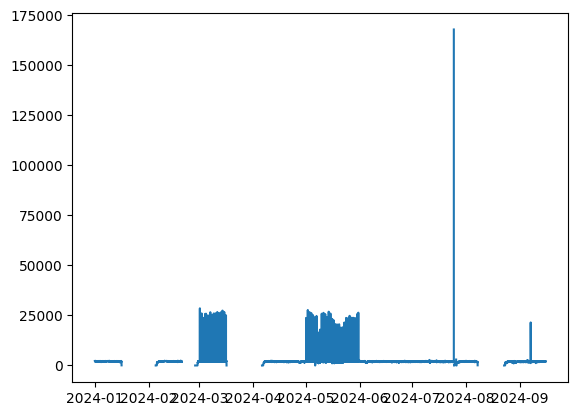

In [18]:
plt.plot(data.index,data['前爐SOx濃度'])
plt.show()

In [19]:
data = data[data['前爐SOx濃度']<data['前爐SOx濃度'].quantile(0.75)]
data

,MLUT4_FQ-239,MLUT4_AT-237,MLUT4_FT-957,MLUT4_FT-951AA,MLUT4_FT-951AB,前爐SOx濃度
datetime,,,,,,
2024-01-01 02:20:00,382.818055,8.909428,3921.489174,90.98853,101.64935,2075.668575
2024-01-01 02:25:00,378.620898,8.912283,3915.606876,90.393427,98.696963,2084.336532
2024-01-01 03:00:00,377.902151,8.932272,3914.160548,89.631163,99.85087,2087.796001
2024-01-01 03:20:00,379.29561,8.943694,3916.803397,90.35264,99.69125,2084.308610
2024-01-01 03:25:00,379.460791,8.94655,3920.188375,90.205945,99.311685,2083.574357
...,...,...,...,...,...,...
2024-09-15 23:35:00,357.875976,9.360355,2639.985169,72.823523,97.405392,2082.274527
2024-09-15 23:40:00,359.734934,9.280099,2644.140047,72.895018,97.528753,2071.948976
2024-09-15 23:45:00,356.871482,9.359701,2636.322947,72.571169,98.286113,2088.339754


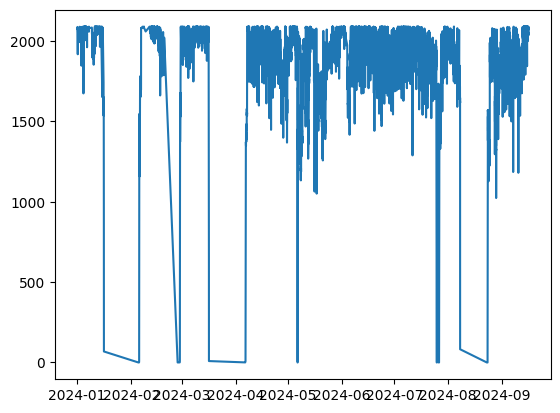

In [20]:
plt.plot(data.index,data['前爐SOx濃度'])
plt.show()

# 數據轉換MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
mm_x = MinMaxScaler()
mm_y = MinMaxScaler()
data[features] = mm_x.fit_transform(data[features])
data[y_col] = mm_y.fit_transform(data[y_col])
data

<ipython-input-21-9c86ed45dfd1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[features] = mm_x.fit_transform(data[features])
<ipython-input-21-9c86ed45dfd1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[y_col] = mm_y.fit_transform(data[y_col])


,MLUT4_FQ-239,MLUT4_AT-237,MLUT4_FT-957,MLUT4_FT-951AA,MLUT4_FT-951AB,前爐SOx濃度
datetime,,,,,,
2024-01-01 02:20:00,0.536827,0.305261,0.869645,0.369872,0.416596,0.992866
2024-01-01 02:25:00,0.530940,0.305406,0.868297,0.367453,0.404496,0.997012
2024-01-01 03:00:00,0.529932,0.306414,0.867966,0.364354,0.409225,0.998667
2024-01-01 03:20:00,0.531887,0.306990,0.868571,0.367287,0.408571,0.996999
2024-01-01 03:25:00,0.532118,0.307134,0.869347,0.366691,0.407015,0.996648
...,...,...,...,...,...,...
2024-09-15 23:35:00,0.501847,0.328002,0.576019,0.296031,0.399202,0.996026
2024-09-15 23:40:00,0.504454,0.323955,0.576971,0.296321,0.399708,0.991087
2024-09-15 23:45:00,0.500438,0.327969,0.575180,0.295005,0.402812,0.998927


In [22]:
data.describe()

,MLUT4_FQ-239,MLUT4_AT-237,MLUT4_FT-957,MLUT4_FT-951AA,MLUT4_FT-951AB,前爐SOx濃度
count,42403.000000,42403.000000,42403.000000,42403.000000,42403.000000,42403.000000
mean,0.541425,0.318984,0.672587,0.314925,0.398639,0.889770
std,0.066614,0.103060,0.185333,0.037817,0.045276,0.165809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480169,0.256215,0.615165,0.294930,0.380634,0.882740
50%,0.552613,0.303689,0.726326,0.312079,0.400706,0.936157
75%,0.594550,0.363422,0.746208,0.331746,0.419348,0.969076
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# NARX 模型

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

class NARX(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, x_lags, y_lags):
        super(NARX, self).__init__()
        self.x_lags = x_lags
        self.y_lags = y_lags
        self.input_dim = input_size * x_lags + output_size * y_lags

        self.net = nn.Sequential(
            nn.Linear(self.input_dim, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, output_size),
            nn.Sigmoid()
        )

    def forward(self, x_hist, y_hist):
        """
        x_hist: shape (batch_size, x_lags, input_size)
        y_hist: shape (batch_size, y_lags, output_size)
        """
        batch_size = x_hist.size(0)
        x_flat = x_hist.reshape(batch_size, -1)
        y_flat = y_hist.reshape(batch_size, -1)
        input_vector = torch.cat([x_flat, y_flat], dim=1)
        return self.net(input_vector)


# 製作數據集

In [24]:
def create_narx_dataset(x_seq, y_seq, x_lags, y_lags):
    X_histories, Y_histories, targets = [], [], []
    for t in range(max(x_lags, y_lags), len(x_seq)):
        x_hist = x_seq[t - x_lags:t]
        y_hist = y_seq[t - y_lags:t]
        target = y_seq[t]
        X_histories.append(x_hist)
        Y_histories.append(y_hist)
        targets.append(target)
    return torch.stack(X_histories), torch.stack(Y_histories), torch.stack(targets)


In [25]:
x_seq = data[features].values
y_seq = data[y_col].values
x_seq = torch.tensor(x_seq, dtype=torch.float32)
y_seq = torch.tensor(y_seq, dtype=torch.float32)

x_lags = 5
y_lags = 5
X_hist, Y_hist, targets = create_narx_dataset(x_seq, y_seq, x_lags, y_lags)
print(X_hist.shape,Y_hist.shape,targets.shape)

# 切分成訓練/測試
def train_test_split(X, Y, targets, train_ratio=0.8):
    total = len(X)
    train_size = int(total * train_ratio)
    return (
        X[:train_size], Y[:train_size], targets[:train_size],
        X[train_size:], Y[train_size:], targets[train_size:]
    )

X_train, Y_train, T_train, X_test, Y_test, T_test = train_test_split(X_hist, Y_hist, targets)
print(X_train.shape,Y_train.shape,T_train.shape,X_test.shape,Y_test.shape,T_test.shape)

torch.Size([42398, 5, 5]) torch.Size([42398, 5, 1]) torch.Size([42398, 1])
torch.Size([33918, 5, 5]) torch.Size([33918, 5, 1]) torch.Size([33918, 1]) torch.Size([8480, 5, 5]) torch.Size([8480, 5, 1]) torch.Size([8480, 1])


# 模型訓練

Epoch 0, Loss: 0.1938
Epoch 10, Loss: 0.1275
Epoch 20, Loss: 0.0790
Epoch 30, Loss: 0.0451
Epoch 40, Loss: 0.0260
Epoch 50, Loss: 0.0170
Epoch 60, Loss: 0.0126
Epoch 70, Loss: 0.0099
Epoch 80, Loss: 0.0080
Epoch 90, Loss: 0.0067
Epoch 100, Loss: 0.0059
Epoch 110, Loss: 0.0052
Epoch 120, Loss: 0.0047
Epoch 130, Loss: 0.0044
Epoch 140, Loss: 0.0040
Epoch 150, Loss: 0.0037
Epoch 160, Loss: 0.0035
Epoch 170, Loss: 0.0032
Epoch 180, Loss: 0.0030
Epoch 190, Loss: 0.0029
Epoch 200, Loss: 0.0027
Epoch 210, Loss: 0.0026
Epoch 220, Loss: 0.0024
Epoch 230, Loss: 0.0023
Epoch 240, Loss: 0.0022
Epoch 250, Loss: 0.0021
Epoch 260, Loss: 0.0020
Epoch 270, Loss: 0.0019
Epoch 280, Loss: 0.0019
Epoch 290, Loss: 0.0018


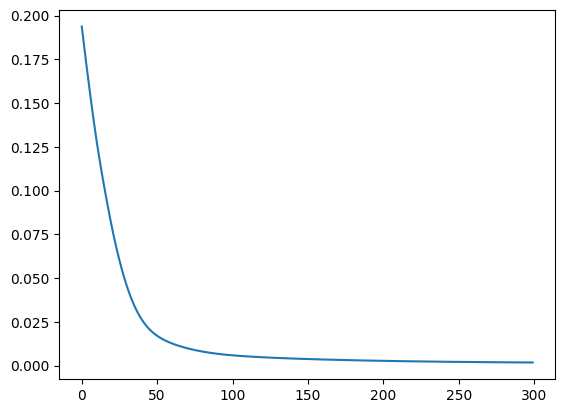

In [26]:
model = NARX(input_size=x_seq.shape[1], hidden_size=64, output_size=y_seq.shape[1], x_lags=x_lags, y_lags=y_lags)
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
train_history = []
for epoch in range(300):
    optimizer.zero_grad()
    y_pred = model(X_train, Y_train)
    loss = loss_fn(y_pred, T_train)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    train_history.append(loss.item())
plt.plot(train_history)
plt.show()

# 預測圖

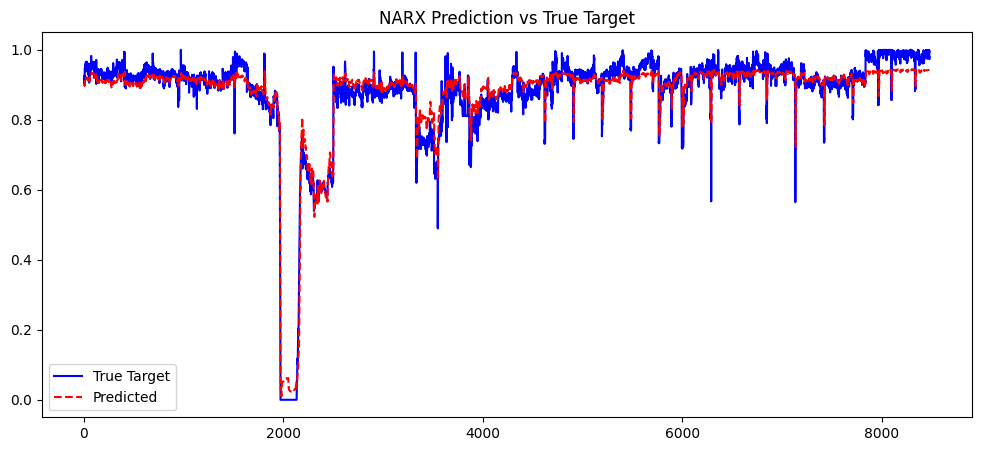

In [27]:
import matplotlib.pyplot as plt

# 把資料轉為 numpy 以利繪圖
y_pred_np = model(X_test, Y_test).detach().cpu().numpy().flatten()
targets_np = T_test.detach().cpu().numpy().flatten()

# 畫圖
plt.figure(figsize=(12, 5))
plt.plot(targets_np, label='True Target', color='blue')
plt.plot(y_pred_np, label='Predicted', color='red', linestyle='--')
plt.legend()
plt.title('NARX Prediction vs True Target')
plt.show()

# 評估結果

In [28]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def mean_absolute_percentage_error(a, b):
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()*100

# 轉換為 numpy
y_true = targets_np
y_predicted = y_pred_np

# 計算指標
r2 = r2_score(y_true, y_predicted)
rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
mape = mean_absolute_percentage_error(y_true, y_predicted)

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}")


R² Score: 0.9487
RMSE: 0.0345
MAPE: 3.1442


<ipython-input-28-7e6e1f0d5488>:6: RuntimeWarning: divide by zero encountered in divide
  return (np.fabs(a - b)/a)[mask].mean()*100
